# Acute Inflammations Data Set
**https://archive.ics.uci.edu/ml/datasets/Acute+Inflammations**


### Data dictionary
<pre class="tab1">
1. a1   | Temperature of patient                                 | { 35C-42C } 
2. a2   | Occurrence of nausea                                   | { yes, no } 
3. a3   | Lumbar pain                                            | { yes, no } 
4. a4   | Urine pushing (continuous need for urination)          | { yes, no } 
5. a5   | Micturition pains                                      | { yes, no } 
6. a6   | Burning of urethra, itch, swelling of urethra outlet   | { yes, no } 
7. d1   | decision: Inflammation of urinary bladder              | { yes, no } 
8. d2   | decision: Nephritis of renal pelvis origin             | { yes, no } 
</pre>


---

Import useful libraries for the analysis

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from src.visualization import plot_dataframe_corr
from src.visualization import plot_target_corr
from src.visualization import multiple_plots

In [2]:
import warnings
warnings.filterwarnings(action="ignore")

In [3]:
pd.set_option('display.precision', 1)

### **1. Load the dataset**

In [4]:
dataset_path = r".\data\diagnosis.data"

In [5]:
colnames = ['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'd1', 'd2']

Open correctly the dataset

In [6]:
df = pd.read_csv(filepath_or_buffer=dataset_path, sep="\s+", na_values='?', names=colnames, encoding="utf-16", decimal=",")
df

,a1,a2,a3,a4,a5,a6,d1,d2
0,35.5,no,yes,no,no,no,no,no
1,35.9,no,no,yes,yes,yes,yes,no
2,35.9,no,yes,no,no,no,no,no
3,36.0,no,no,yes,yes,yes,yes,no
4,36.0,no,yes,no,no,no,no,no
...,...,...,...,...,...,...,...,...
115,41.4,no,yes,yes,no,yes,no,yes
116,41.5,no,no,no,no,no,no,no
117,41.5,yes,yes,no,yes,no,no,yes
118,41.5,no,yes,yes,no,yes,no,yes


Make a copy of the dataset

In [7]:
df_copy = df.copy()

Display column names of the dataset

In [8]:
df.columns

Index(['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'd1', 'd2'], dtype='object')

Display data types

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a1      120 non-null    float64
 1   a2      120 non-null    object 
 2   a3      120 non-null    object 
 3   a4      120 non-null    object 
 4   a5      120 non-null    object 
 5   a6      120 non-null    object 
 6   d1      120 non-null    object 
 7   d2      120 non-null    object 
dtypes: float64(1), object(7)
memory usage: 7.6+ KB


 Count number of distinct elements in each column

In [10]:
df.nunique()

a1    44
a2     2
a3     2
a4     2
a5     2
a6     2
d1     2
d2     2
dtype: int64

Display the dataset dimensions

In [11]:
df.shape

(120, 8)

Find possible missing values

In [12]:
df.isnull().sum()

a1    0
a2    0
a3    0
a4    0
a5    0
a6    0
d1    0
d2    0
dtype: int64

### **2. Exploratory Data Analysis (EDA)**

Display basic statistics info

In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
a1,120.0,38.7,1.8,35.5,37.1,38.0,40.6,41.5


In [14]:
df.drop('a1', axis=1).describe( ).transpose()

,count,unique,top,freq
a2,120,2,no,91
a3,120,2,yes,70
a4,120,2,yes,80
a5,120,2,no,61
a6,120,2,no,70
d1,120,2,no,61
d2,120,2,no,70


Encode categorical variables

In [15]:
df = pd.get_dummies(data=df, drop_first=True, dtype=np.int64)
df.columns = colnames
df

,a1,a2,a3,a4,a5,a6,d1,d2
0,35.5,0,1,0,0,0,0,0
1,35.9,0,0,1,1,1,1,0
2,35.9,0,1,0,0,0,0,0
3,36.0,0,0,1,1,1,1,0
4,36.0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
115,41.4,0,1,1,0,1,0,1
116,41.5,0,0,0,0,0,0,0
117,41.5,1,1,0,1,0,0,1
118,41.5,0,1,1,0,1,0,1


Plot a correlation matrix

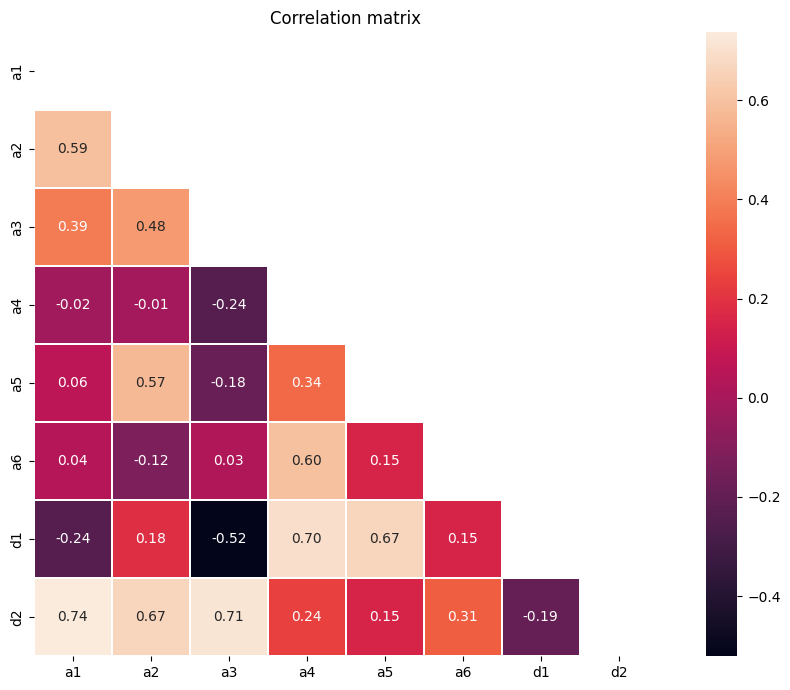

In [16]:
plot_dataframe_corr(data=df)

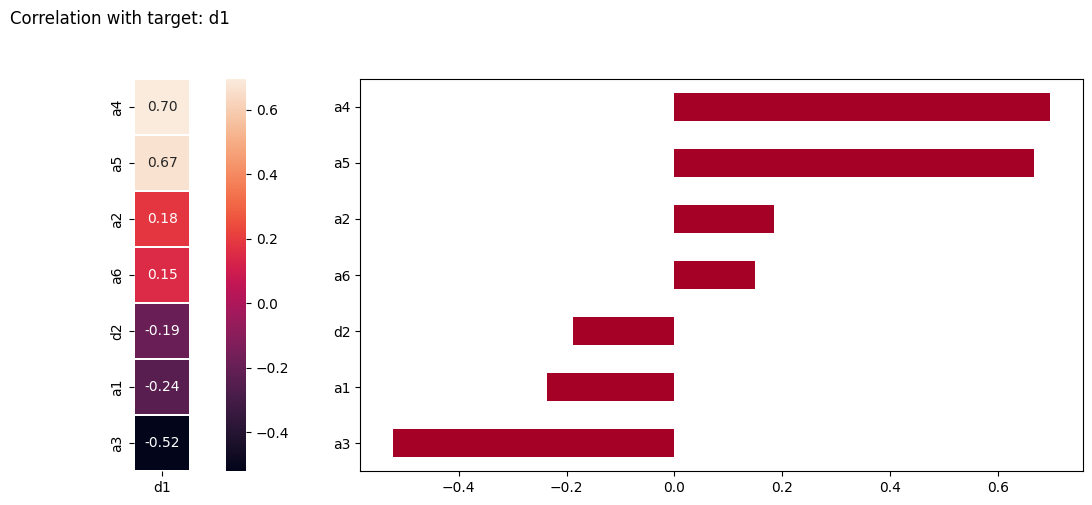

In [17]:
plot_target_corr(data=df, column='d1')

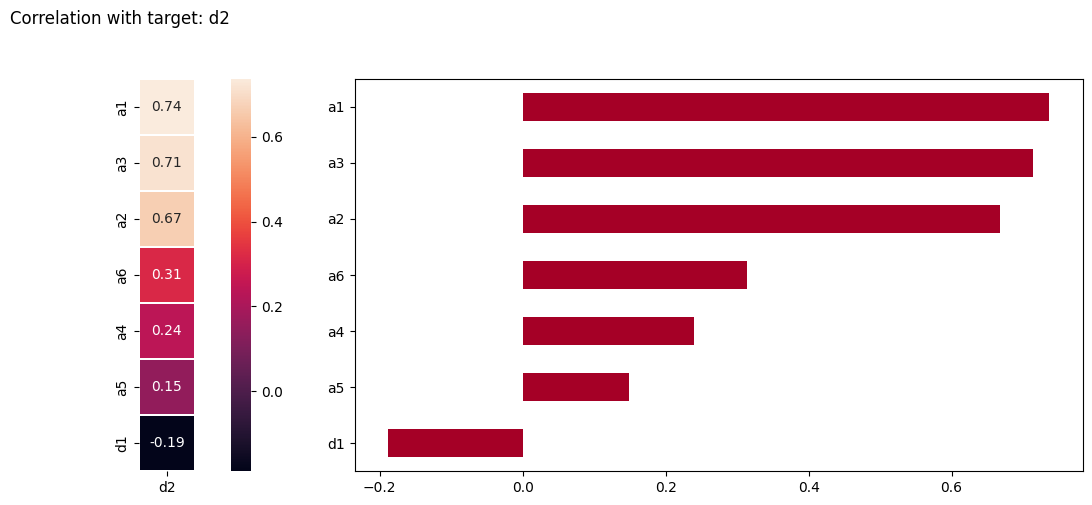

In [18]:
plot_target_corr(data=df, column='d2')

**Continuous variables**

Histplots

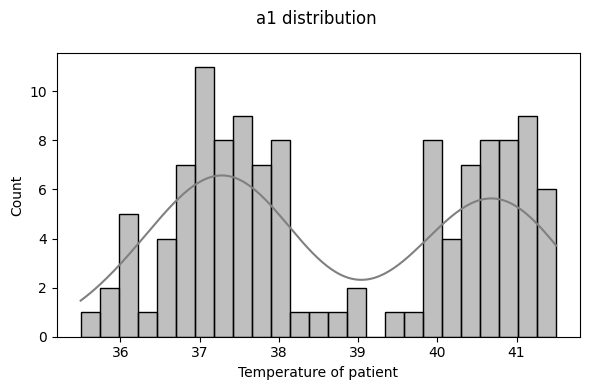

In [19]:
plt.figure(figsize=(6,4))
sns.histplot(x=df['a1'], kde=True, bins=25, color='grey')
plt.title('a1 distribution \n', size=12)
plt.xlabel('Temperature of patient')
plt.tight_layout()
plt.show()

Boxplots

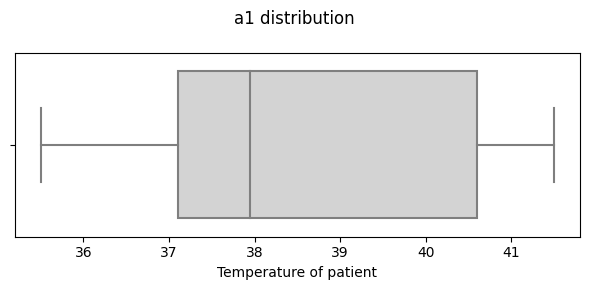

In [20]:
plt.figure(figsize=(6,3))
sns.boxplot(data=df, x='a1', color='lightgrey')
plt.title('a1 distribution \n', size=12)
plt.xlabel('Temperature of patient')
plt.tight_layout()
plt.show()

**Multi-valued discrete variables**

In [21]:
discrete = df.drop('a1', axis=1).columns
discrete

Index(['a2', 'a3', 'a4', 'a5', 'a6', 'd1', 'd2'], dtype='object')

Countplots

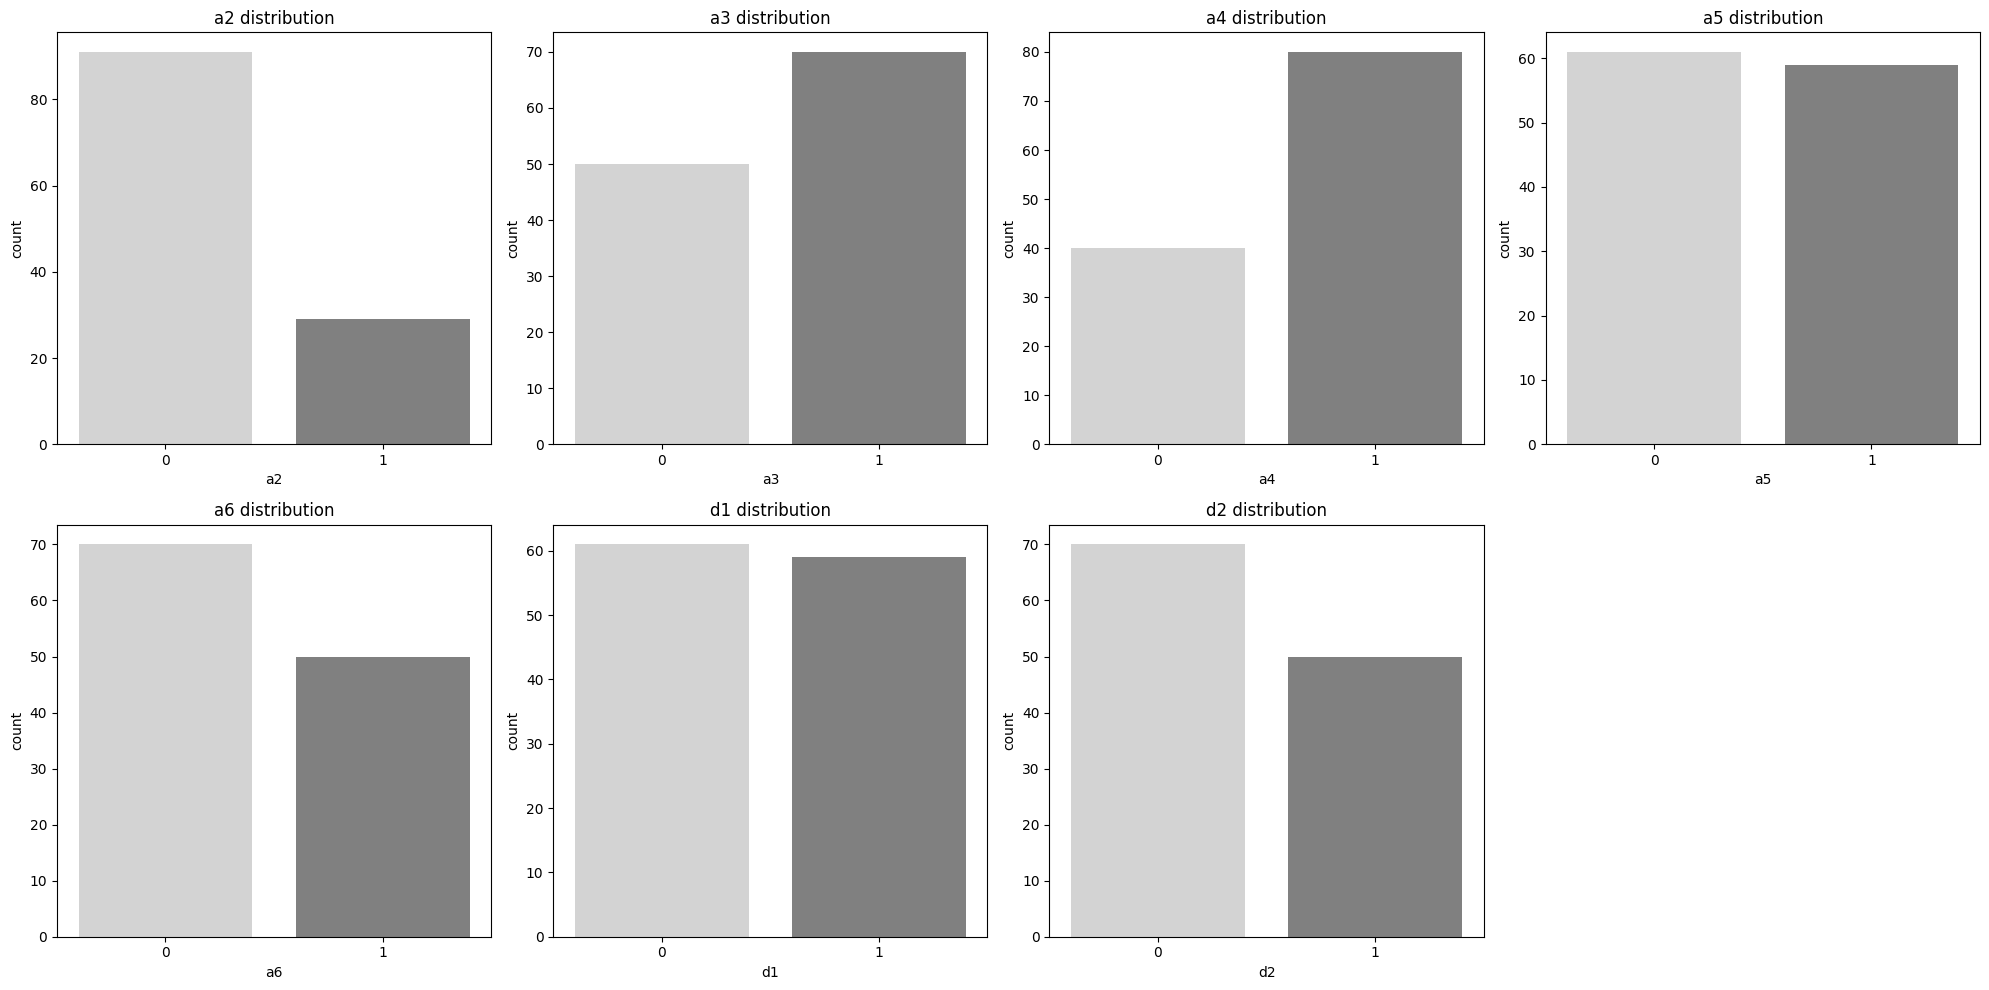

In [22]:
multiple_plots(data=df, columns=discrete, nrows=2, ncols=4, kind='countplot', palette={0:'lightgrey', 1:'grey'})

**Bivariate analysis**

- *All features vs d1*

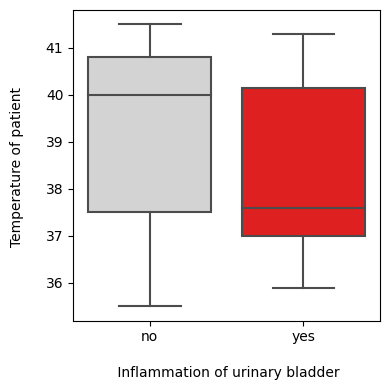

In [23]:
plt.figure(figsize=(4,4))
sns.boxplot(data=df_copy, x='d1', y='a1', palette={'no':'lightgrey', 'yes':'red'})
plt.xlabel('\n Inflammation of urinary bladder')
plt.ylabel('Temperature of patient \n')
plt.tight_layout()
plt.show()

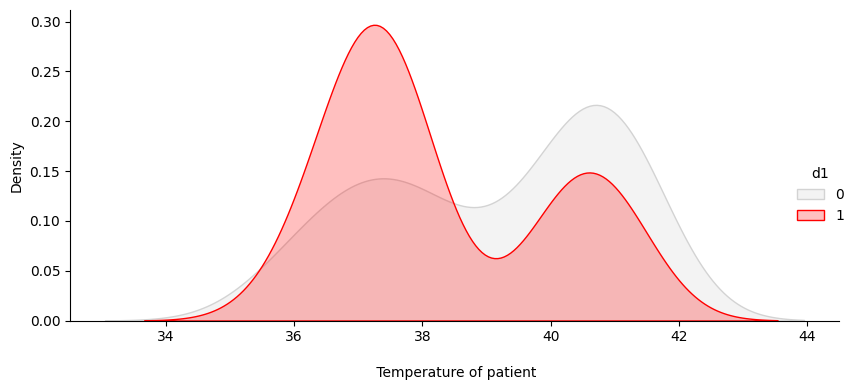

In [24]:
density_plot  = sns.FacetGrid(df, hue="d1", height=4, aspect=2, palette={0:'lightgrey', 1:'red'})
density_plot.map(sns.kdeplot, "a1", shade=True)
density_plot.add_legend()
plt.xlabel('\n Temperature of patient')
plt.tight_layout()
plt.show()

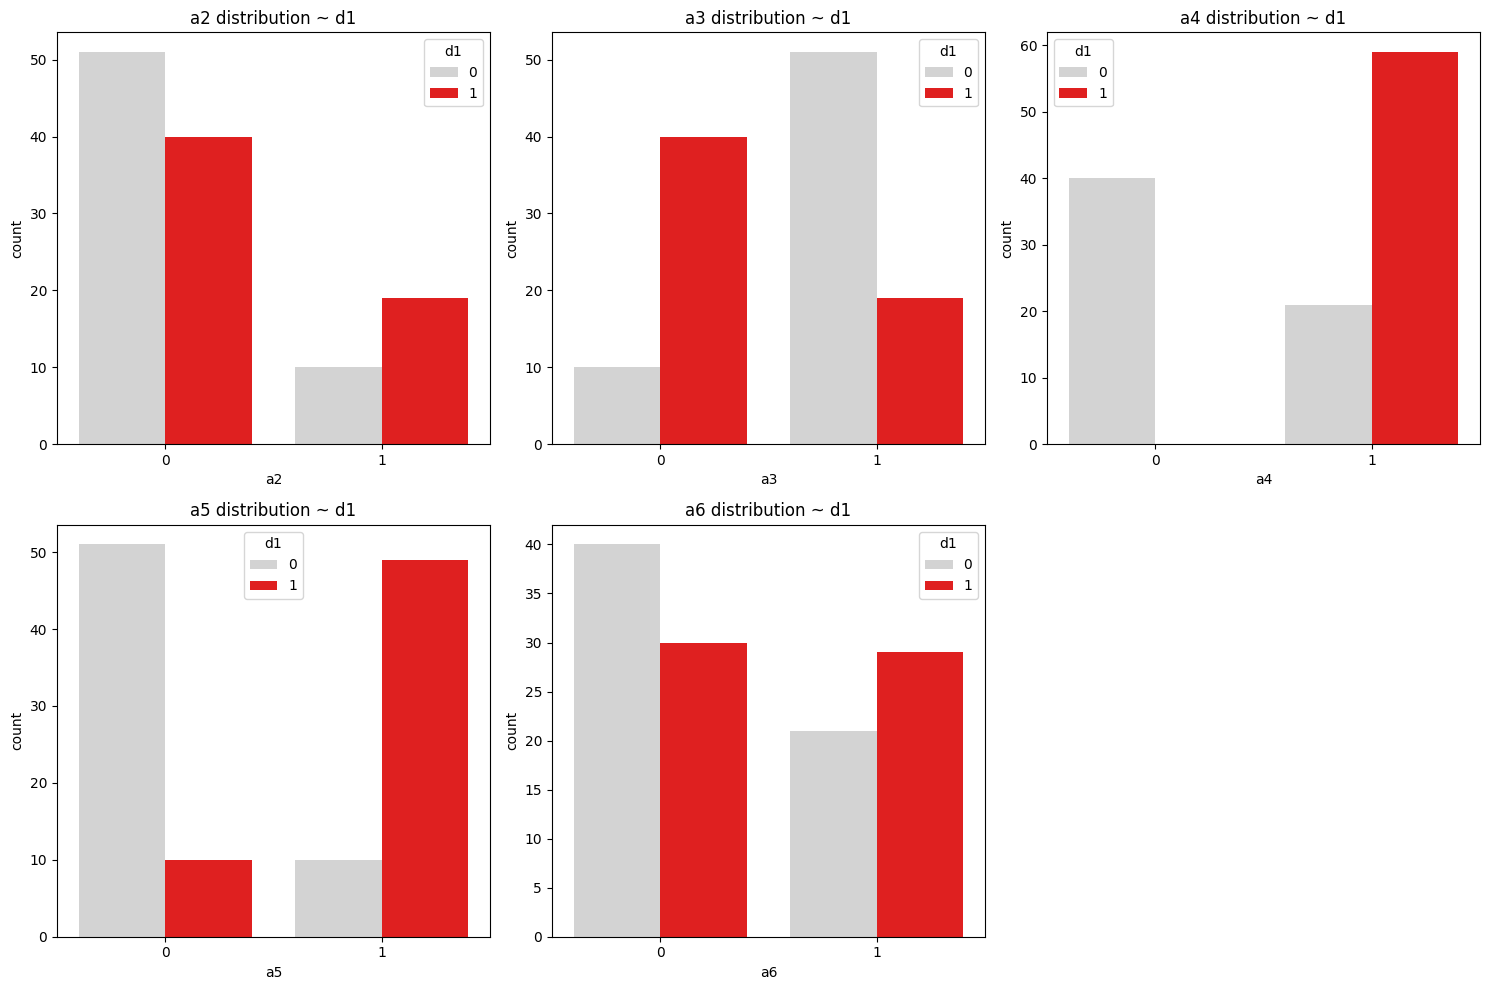

In [25]:
multiple_plots(data=df, columns=['a2', 'a3', 'a4', 'a5', 'a6'], nrows=2, ncols=3, kind='countplot', target='d1', palette={0:'lightgrey', 1:'red'})

- *All features vs d2*

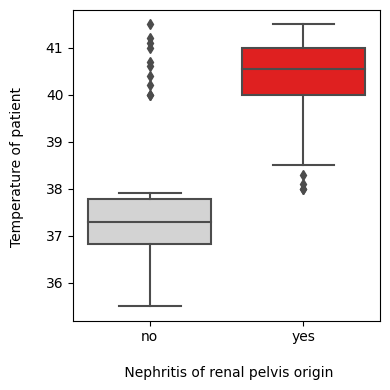

In [26]:
plt.figure(figsize=(4,4))
sns.boxplot(data=df_copy, x='d2', y='a1', palette={'no':'lightgrey', 'yes':'red'})
plt.xlabel('\n Nephritis of renal pelvis origin')
plt.ylabel('Temperature of patient \n')
plt.tight_layout()
plt.show()

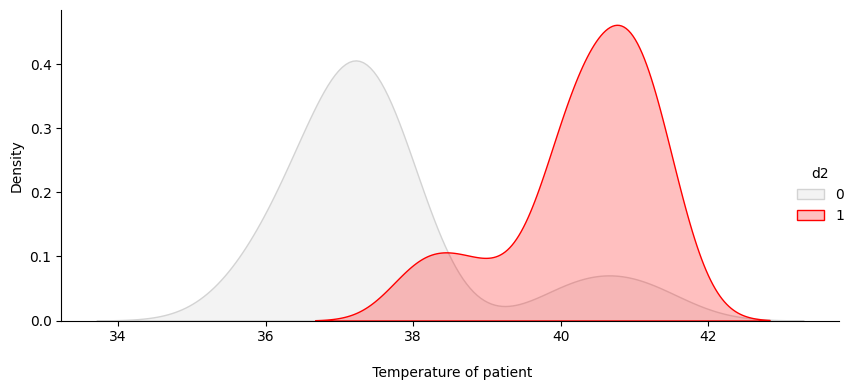

In [27]:
density_plot = sns.FacetGrid(df, hue="d2", height=4, aspect=2, palette={0:'lightgrey', 1:'red'})
density_plot.map(sns.kdeplot, "a1", shade=True)
density_plot.add_legend()
plt.xlabel('\n Temperature of patient')
plt.tight_layout()
plt.show()

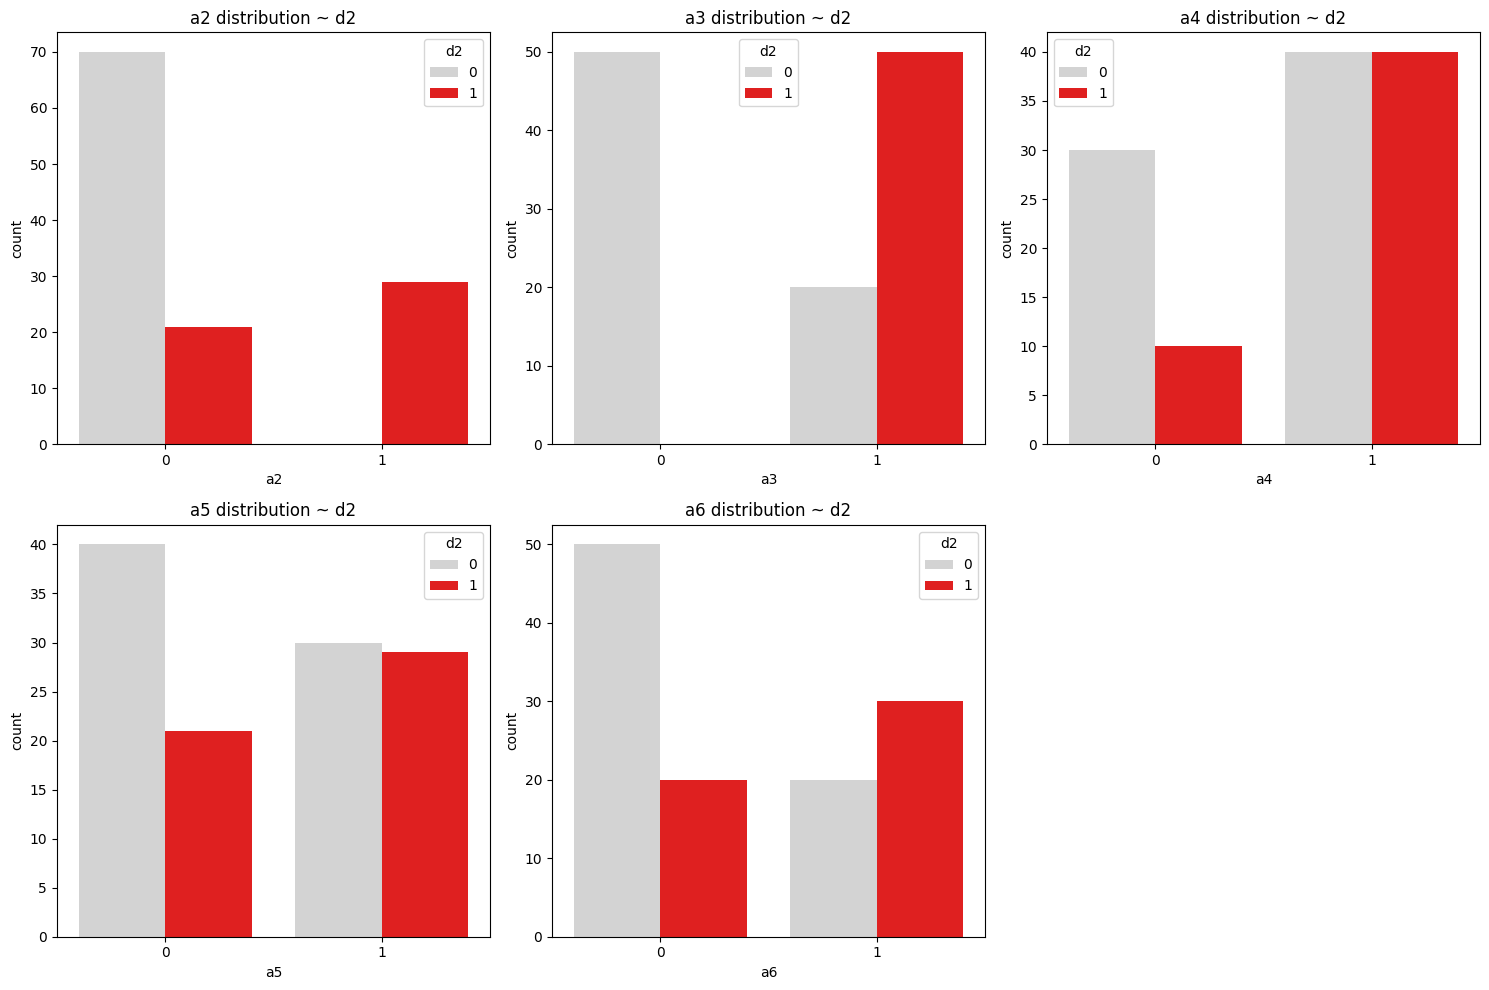

In [28]:
multiple_plots(data=df, columns=['a2', 'a3', 'a4', 'a5', 'a6'], nrows=2, ncols=3, kind='countplot', target='d2', palette={0:'lightgrey', 1:'red'})

### **3. Preparing the Data**

In [29]:
df.shape

(120, 8)

In [30]:
%store df

Stored 'df' (DataFrame)
